In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pickle
import os

In [2]:
random_state = 2
pd.set_option('display.max_rows', 200)

In [3]:
file_name = "../data/raw/bank-customer-churn-prediction.csv"

In [4]:
df = pd.read_csv(file_name)

## Initial Data Assessment

Do BEFORE splitting:
- Basic data inspection - shape, column names, data types
- Check for missing values - counts/percentages of NAs
- Identify obvious data quality issues - duplicates, impossible values
- Understand the target distribution - check class imbalance

In [5]:
df.shape

(10000, 12)

In [6]:
df.sample(8, random_state=random_state).T

,7878,3224,1919,4432,4835,4895,7269,1451
customer_id,15760456,15713463,15739858,15751193,15590623,15589435,15675926,15684198
credit_score,731,645,618,621,561,784,655,551
country,France,Germany,France,Spain,Spain,France,Germany,France
gender,Female,Female,Male,Male,Male,Male,Male,Female
age,38,41,56,33,34,31,34,38
tenure,10,2,7,4,4,7,7,10
balance,123711.73,138881.04,0.0,0.0,85141.79,0.0,118028.35,0.0
products_number,2,1,1,2,2,2,1,2
credit_card,1,1,1,1,1,1,1,1
active_member,0,0,1,1,1,1,0,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


### Missing values

In [8]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

### Identify obvious quality issues
Check duplicates, impossible values

In [9]:
number_of_duplicated_rows = df.duplicated().value_counts()
number_of_duplicated_rows

False    10000
Name: count, dtype: int64

In [10]:
number_of_duplicated_rows_by_customer_id = df["customer_id"].duplicated().value_counts()
number_of_duplicated_rows_by_customer_id

customer_id
False    10000
Name: count, dtype: int64

In [11]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer_id,10000.0,NaN,NaN,NaN,15690940.5694,71936.186123,15565701.0,15628528.25,15690738.0,15753233.75,15815690.0
credit_score,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
country,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
tenure,10000.0,NaN,NaN,NaN,5.0128,2.892174,0.0,3.0,5.0,7.0,10.0
balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
products_number,10000.0,NaN,NaN,NaN,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0
credit_card,10000.0,NaN,NaN,NaN,0.7055,0.45584,0.0,0.0,1.0,1.0,1.0
active_member,10000.0,NaN,NaN,NaN,0.5151,0.499797,0.0,0.0,1.0,1.0,1.0


### Target distribution

In [12]:
df["churn"].value_counts(normalize=True)

churn
0    0.7963
1    0.2037
Name: proportion, dtype: float64

## EDA

In [13]:
target_column = "churn"
numerical_columns = df.select_dtypes(include=[np.number]).columns.to_list()
numerical_columns.remove(target_column)

In [14]:
categorical_columns = df.select_dtypes(include=["object", "category"]).columns.to_list()

### Numerical destributions

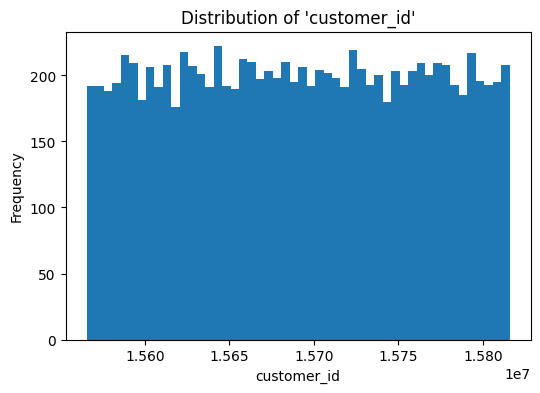

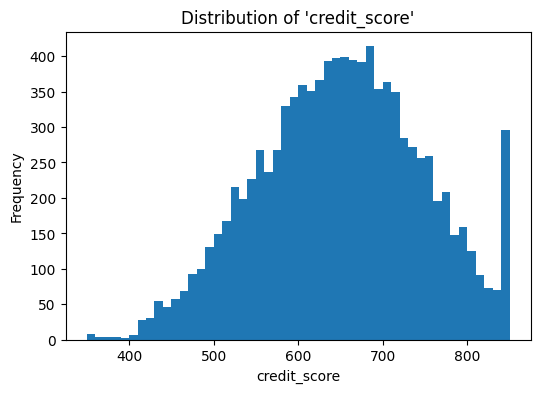

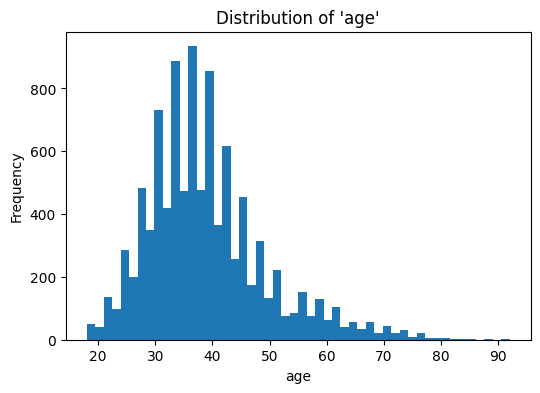

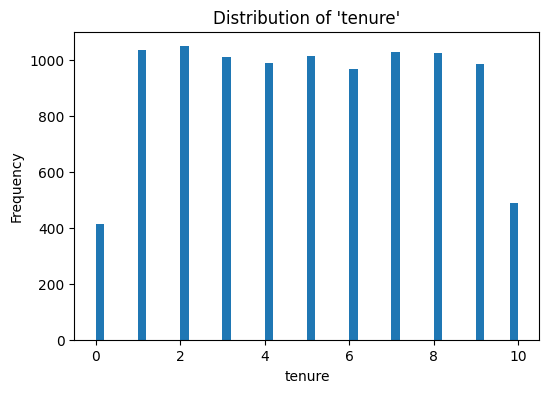

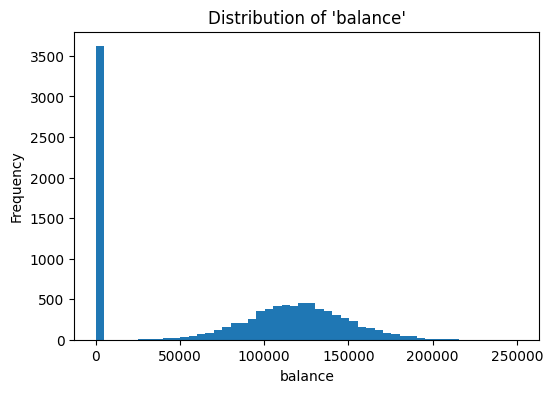

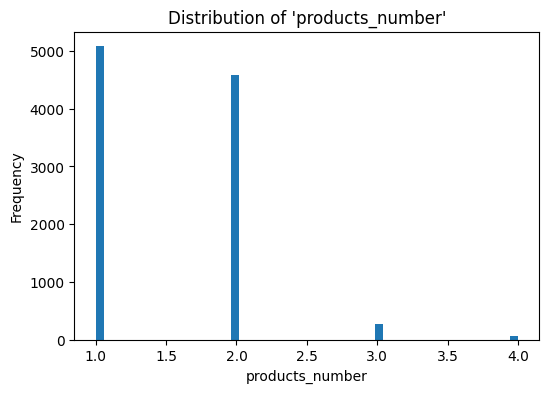

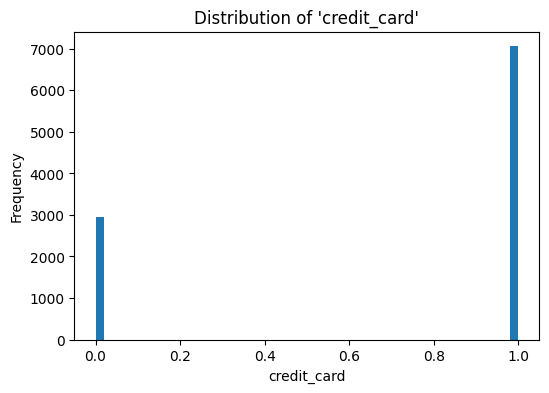

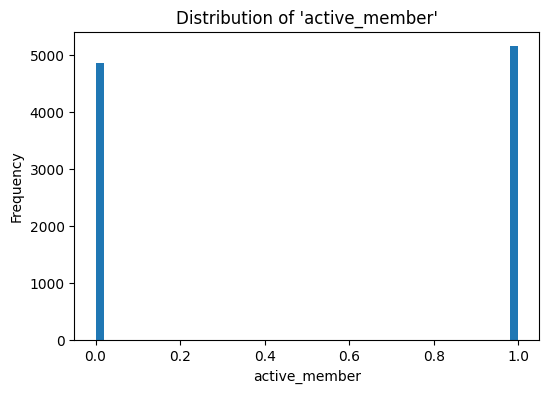

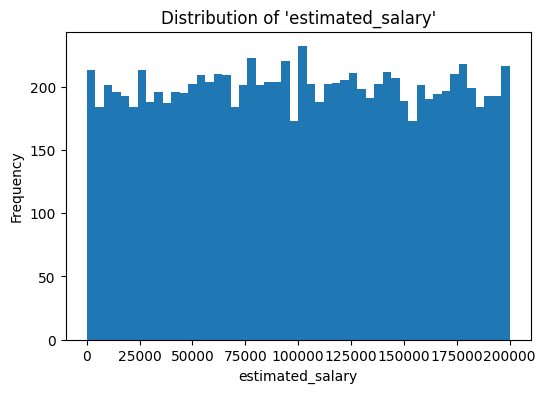

In [15]:
for col in numerical_columns:
    plt.figure(figsize=(6,4))
    plt.hist(df[col], bins=50)
    plt.title(f"Distribution of '{col}'")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

#### The outcome
It makes sense to create extra column "balance_exists". For 3,5k+ rows the value of this column will be `False`

### Boxplots for outlier detection

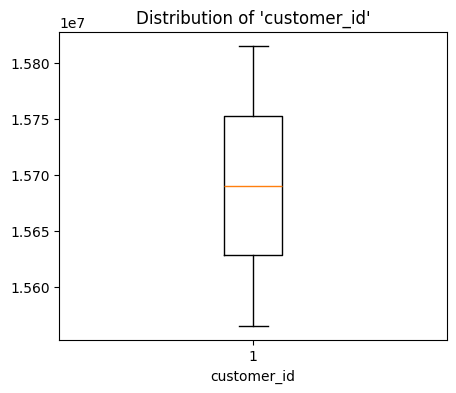

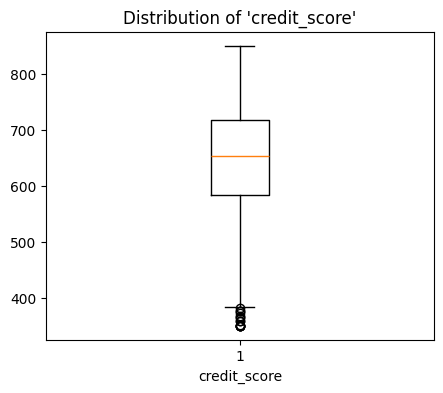

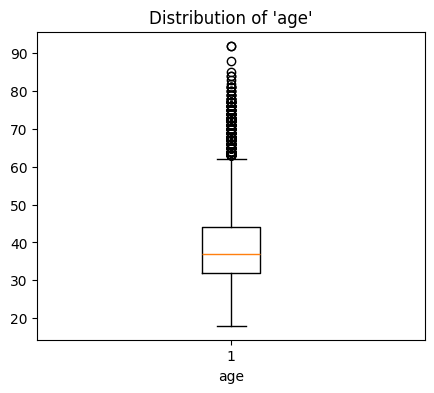

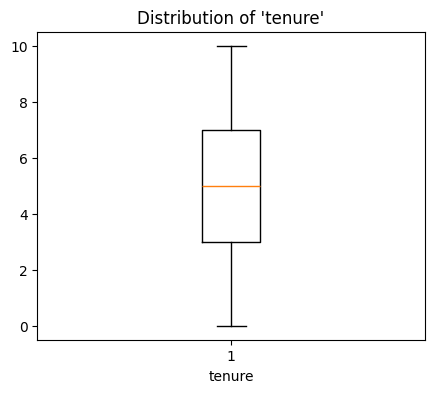

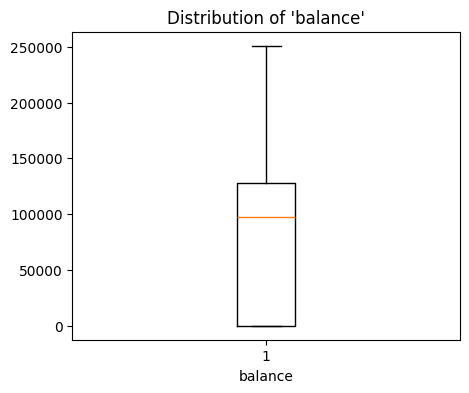

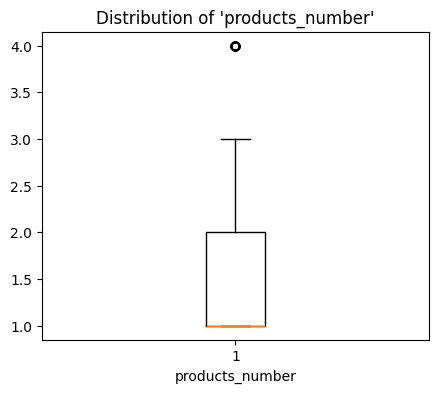

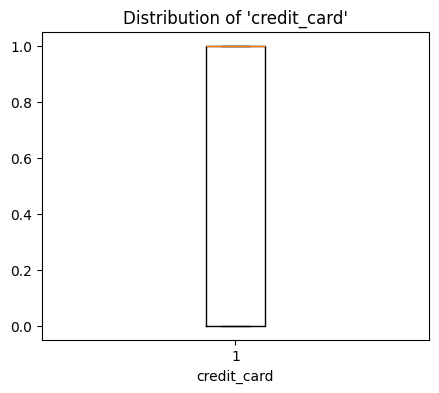

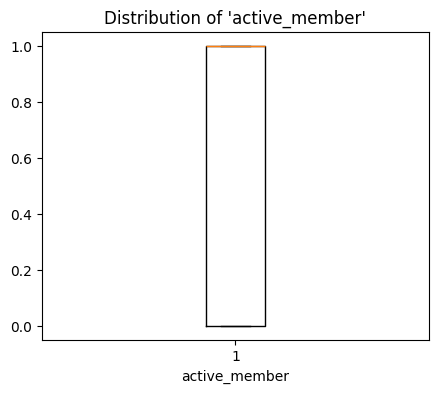

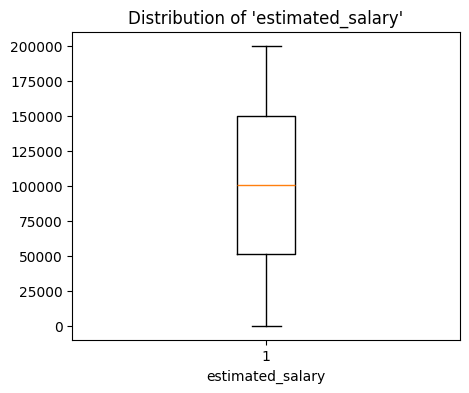

In [16]:
for col in numerical_columns:
    plt.figure(figsize=(5,4))
    plt.boxplot(df[col], vert=True)
    plt.title(f"Distribution of '{col}'")
    plt.xlabel(col)
    plt.show()

#### Age distribution by churn status

In [17]:
stayed = df.loc[(df["churn"]==0), "age"].dropna()
churned = df.loc[(df["churn"]==1), "age"].dropna()

In [18]:
stayed.head(2)

1    41
3    39
Name: age, dtype: int64

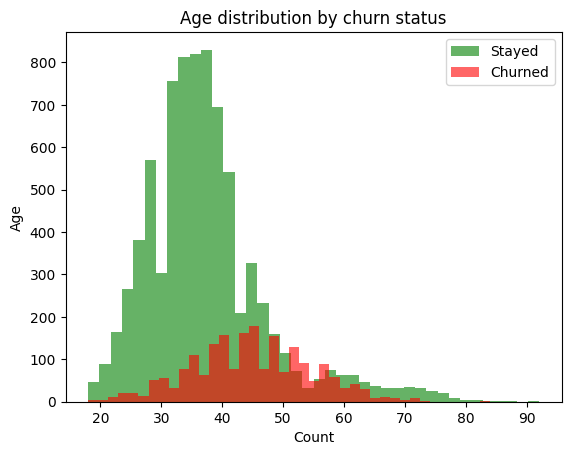

In [19]:
plt.hist(stayed, bins=40, color="green", alpha=0.6, label="Stayed")
plt.hist(churned, bins=40, color="red", alpha=0.6, label="Churned")
plt.title("Age distribution by churn status")
plt.xlabel("Count")
plt.ylabel("Age")
plt.legend()
plt.show()

#### Credit Score Distribution by Churn Status

In [20]:
stayed_credit_score = df.loc[df["churn"]==0, "credit_score"].dropna()
churned_credit_score = df.loc[df["churn"]==1, "credit_score"].dropna()

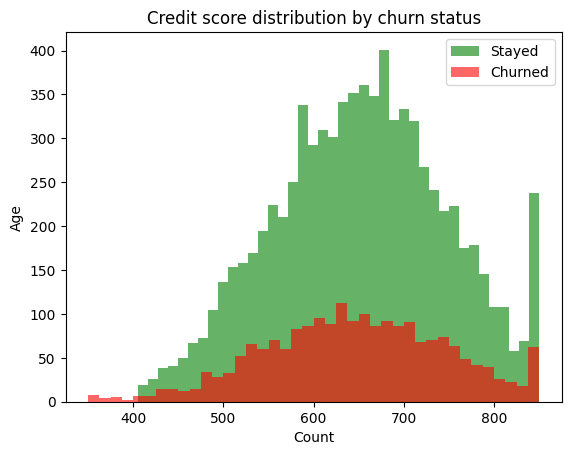

In [21]:
plt.hist(stayed_credit_score, bins=40, color="green", alpha=0.6, label="Stayed")
plt.hist(churned_credit_score, bins=40, color="red", alpha=0.6, label="Churned")
plt.title("Credit score distribution by churn status")
plt.xlabel("Count")
plt.ylabel("Age")
plt.legend()
plt.show()

#### Churn distribution

In [22]:
churn_count = df["churn"].value_counts()

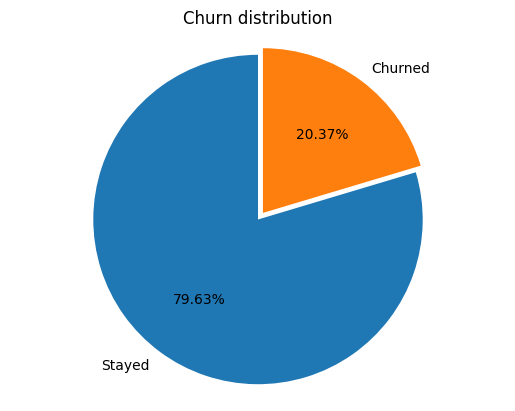

In [23]:
# add human-readable labels to the dataframe (keeps numeric churn if you need it)
df['churn_label'] = df['churn'].map({0: 'Stayed', 1: 'Churned'})

# plot using the mapped labels
labels = [ {0: 'Stayed', 1: 'Churned'}[i] for i in churn_count.index ]
plt.pie(churn_count.values, labels=labels, autopct='%1.2f%%', startangle=90, explode=(0.05, 0))
plt.title("Churn distribution")
plt.axis('equal')
plt.show()

### Categorical feature analysis

Value counts for country:
 country
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64


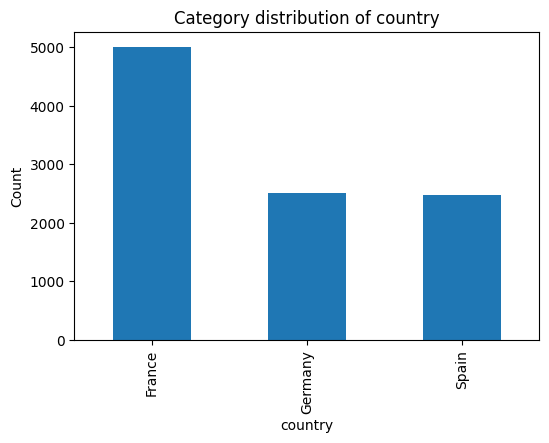

Value counts for gender:
 gender
Male      5457
Female    4543
Name: count, dtype: int64


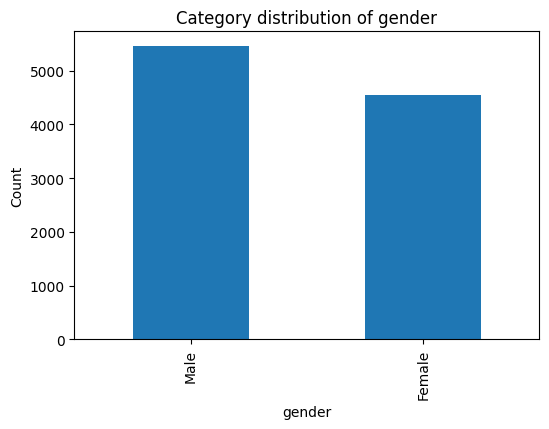

In [24]:
for col in categorical_columns:
    print(f"Value counts for {col}:\n", df[col].value_counts())

    plt.figure(figsize=(6,4))
    df[col].value_counts().plot(kind="bar")
    plt.title(f"Category distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

### Correlation Matrix (numerical only)

In [25]:
corr_matrix = df[numerical_columns].corr()
corr_matrix

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
customer_id,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271
credit_score,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384
age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201
tenure,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784
balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797
products_number,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204
credit_card,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933
active_member,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421
estimated_salary,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000


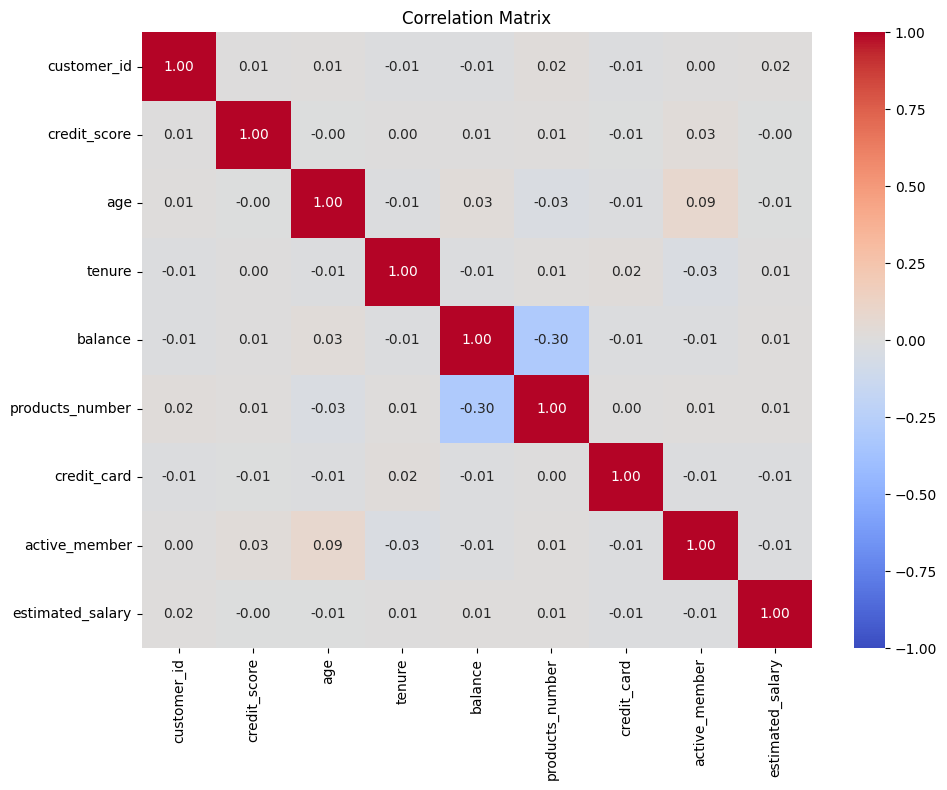

In [26]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

### Relationship between numerical features and churn

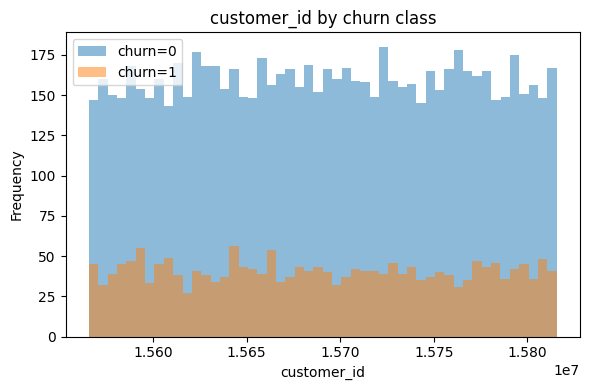

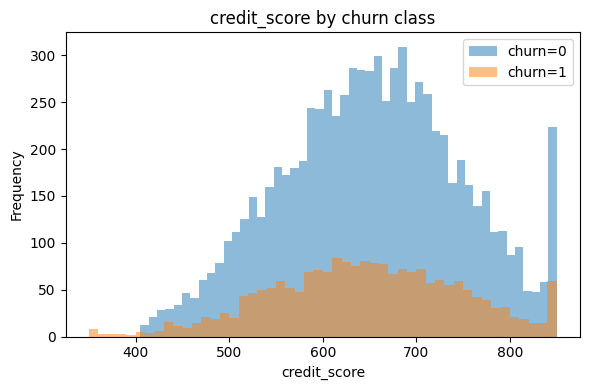

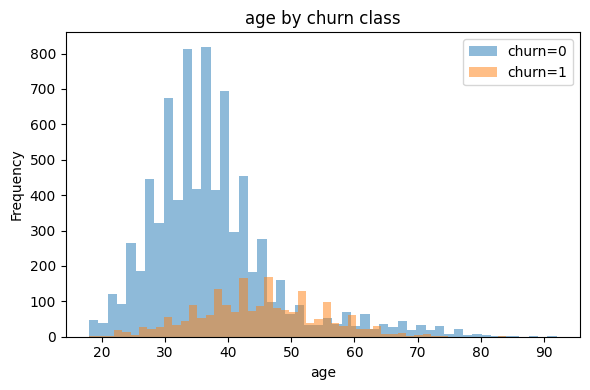

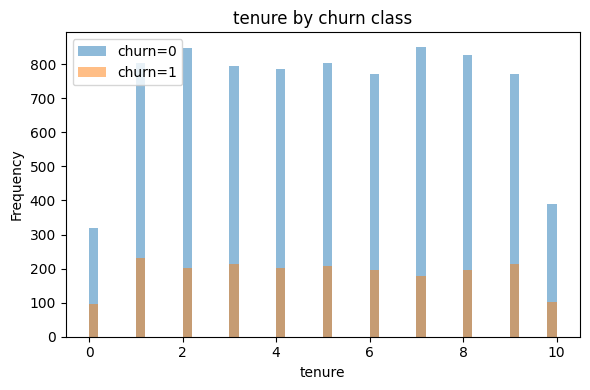

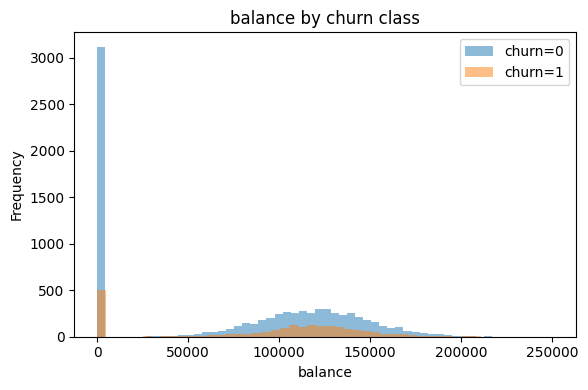

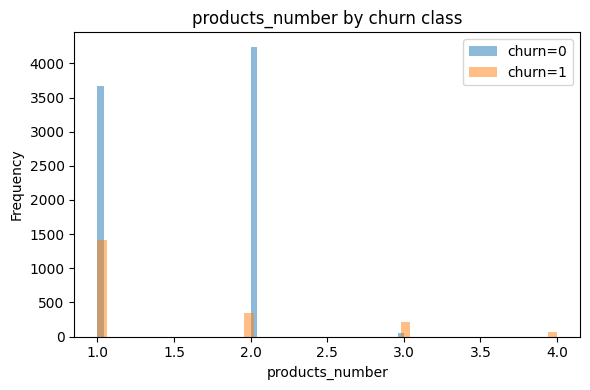

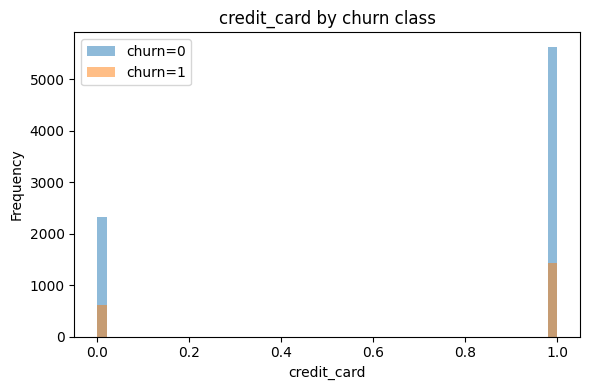

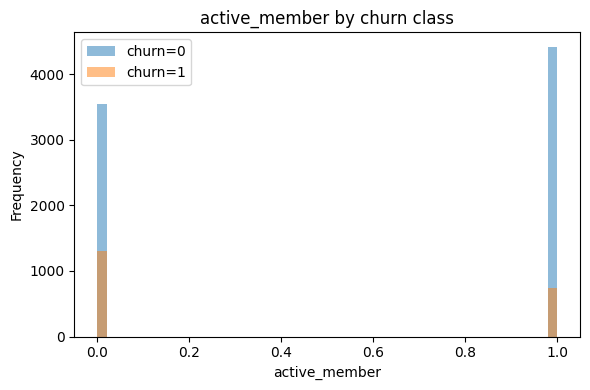

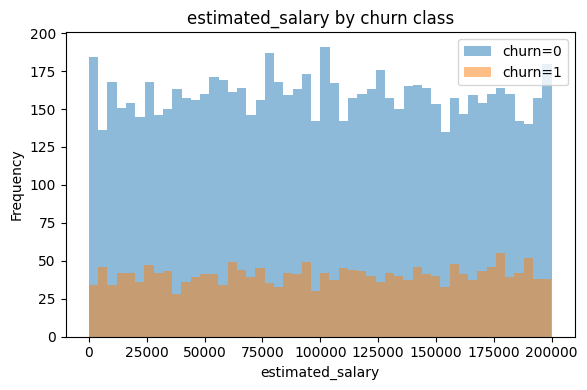

In [27]:
if "churn" in df.columns:
    for col in numerical_columns:
        if col == "churn":
            continue

        plt.figure(figsize=(6,4))
        plt.hist(df[df["churn"] == 0][col].dropna(), bins=50, alpha=0.5, label="churn=0")
        plt.hist(df[df["churn"] == 1][col].dropna(), bins=50, alpha=0.5, label="churn=1")
        plt.title(f"{col} by churn class")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.legend()
        plt.tight_layout()
        plt.show()

### Relation between categorical features and churn

In [28]:
df.groupby("country")["churn"].mean()

country
France     0.161548
Germany    0.324432
Spain      0.166734
Name: churn, dtype: float64


Churn rate by country:
 country
France     0.161548
Germany    0.324432
Spain      0.166734
Name: churn, dtype: float64


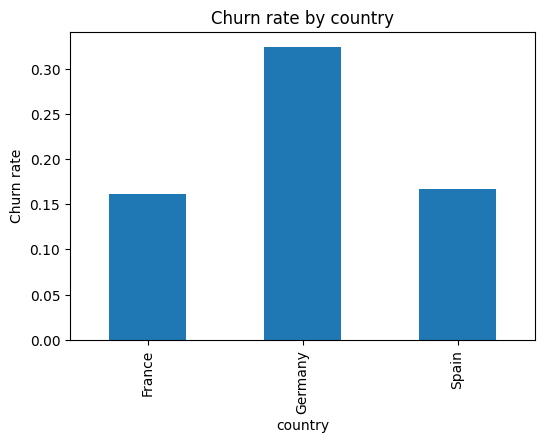


Churn rate by gender:
 gender
Female    0.250715
Male      0.164559
Name: churn, dtype: float64


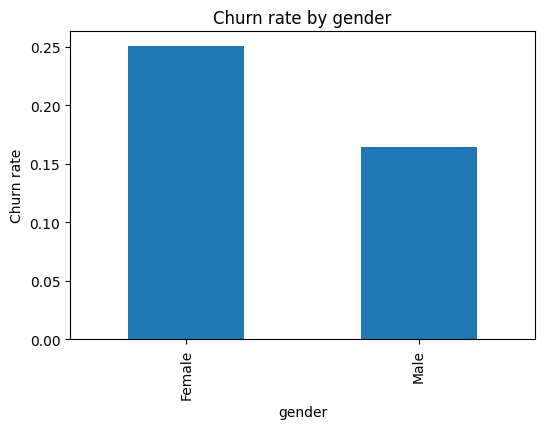

In [29]:
for col in categorical_columns:
    churn_rate = df.groupby(col)["churn"].mean()
    print(f"\nChurn rate by {col}:\n", churn_rate)

    plt.figure(figsize=(6,4))
    churn_rate.plot(kind="bar")
    plt.title(f"Churn rate by {col}")
    plt.xlabel(col)
    plt.ylabel("Churn rate")
    plt.show()

### Initial observations and data-quality checks

In [30]:
print("\nUnique values per column:\n", df.nunique())

if "age" in df.columns:
    print("\nAge range:", df["age"].min(), "-", df["age"].max())

if "credit_score" in df.columns:
    print("Credit score range:", df["credit_score"].min(), "-", df["credit_score"].max())

if "balance" in df.columns:
    print("Balance negative values:", (df["balance"] < 0).sum())


Unique values per column:
 customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
churn_label             2
dtype: int64

Age range: 18 - 92
Credit score range: 350 - 850
Balance negative values: 0


## Split the dataset
To avoid data leakage we need to split our dataset. If we calculate the mean of a column, we need to do it against train dataset only.

Let's store `customer_id` for debugging purposes and error analysis.

In [31]:
customer_ids = df["customer_id"]

In [32]:
X = df.drop(["customer_id", "churn"], axis=1)
y = df["churn"]

In [33]:
# Split everything with the same indices
X_train, X_test, y_train, y_test, id_train, id_test = train_test_split(
    X, y, customer_ids,
    test_size=0.2,
    random_state=random_state,
    stratify=y
)

#### Save the Python dictionary

In [50]:
os.makedirs("../data/interim", exist_ok=True)
with open("../data/interim/train_test_split.pkl", "wb") as file:
    pickle.dump({
        "X_train": X_train,
        "X_test": X_test,
        "y_train": y_train,
        "y_test": y_test,
        "id_train": id_train,
        "id_test": id_test
    }, file)